In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("RAW_global_confirmed_cases.csv")
df1 = pd.read_csv("RAW_global_deaths.csv")

In [3]:
df.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [4]:
df1.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In both the datasets Provinces/State data is unavailable, so lets drop it

In [5]:
df = df.drop(columns='Province/State')
df1 = df1.drop(columns='Province/State')

In [21]:
df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [24]:
print(df.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 288
Columns: 1146 entries, Country/Region to 3/9/23
dtypes: float64(2), int64(1143), object(1)
memory usage: 2.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 288
Columns: 1146 entries, Country/Region to 3/9/23
dtypes: float64(2), int64(1143), object(1)
memory usage: 2.5+ MB
None


In [15]:
na = df.isna()
print(na.sum())

Country/Region    0
Lat               2
Long              2
1/22/20           0
1/23/20           0
                 ..
3/5/23            0
3/6/23            0
3/7/23            0
3/8/23            0
3/9/23            0
Length: 1146, dtype: int64


In [16]:
na1 = df1.isna()
print(na1.sum())

Country/Region    0
Lat               2
Long              2
1/22/20           0
1/23/20           0
                 ..
3/5/23            0
3/6/23            0
3/7/23            0
3/8/23            0
3/9/23            0
Length: 1146, dtype: int64


In [17]:
df = df.dropna()
df1 = df1.dropna()

Data Cleaned, onto the data visualisation part

In [23]:
import plotly.express as px
import pandas as pd

# Choose the date column for visualization
date_column = '3/9/23'  # Replace with the specific date you want to visualize

# Create a Plotly choropleth map
fig = px.choropleth(df, 
                    locations='Country/Region',
                    locationmode='country names',
                    color=date_column,
                    color_continuous_scale="YlOrRd",
                    title=f'COVID-19 Case Density on {date_column}',
                    hover_name='Country/Region',
                    projection='natural earth')

# Show the map
fig.show()


In [25]:
import plotly.express as px
import pandas as pd

# Choose the date column for visualization
date_column = '3/9/23'  # Replace with the specific date you want to visualize

# Create a Plotly choropleth map
fig = px.choropleth(df1, 
                    locations='Country/Region',
                    locationmode='country names',
                    color=date_column,
                    color_continuous_scale="YlOrRd",
                    title=f'COVID-19 Case Density on {date_column}',
                    hover_name='Country/Region',
                    projection='natural earth')

# Show the map
fig.show()


C:\Users\Kshit\AppData\Local\Temp\ipykernel_5796\374289915.py:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




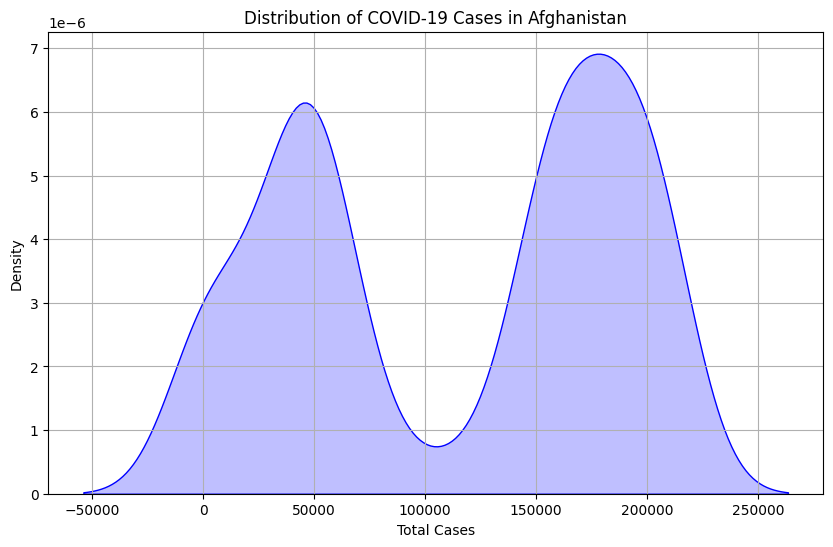

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the country you want to visualize (e.g., Afghanistan)
country_name = "Afghanistan"

# Select the data for the chosen country
afghanistan_data = df[df["Country/Region"] == country_name]

# Extract the daily case counts
case_counts = afghanistan_data.iloc[:, 4:].sum()

# Create a kernel density plot to visualize the distribution of COVID-19 cases in Afghanistan over time
plt.figure(figsize=(10, 6))
sns.kdeplot(case_counts, color='blue', shade=True)
plt.title(f'Distribution of COVID-19 Cases in {country_name}')
plt.xlabel('Total Cases')
plt.ylabel('Density')
plt.grid(True)
plt.show()


C:\Users\Kshit\AppData\Local\Temp\ipykernel_5796\2629870029.py:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




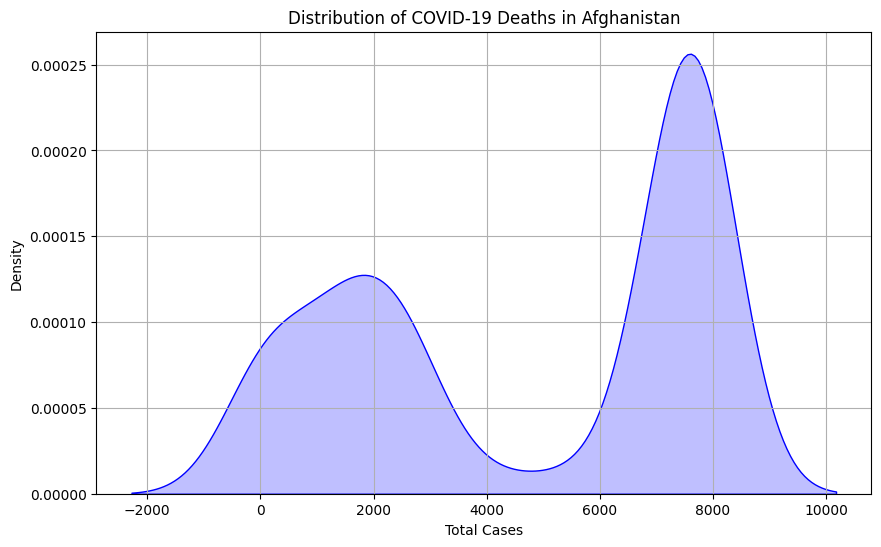

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the country you want to visualize (e.g., Afghanistan)
country_name = "Afghanistan"

# Select the data for the chosen country
afghanistan_data = df1[df1["Country/Region"] == country_name]

# Extract the daily case counts
case_counts = afghanistan_data.iloc[:, 4:].sum()

# Create a kernel density plot to visualize the distribution of COVID-19 cases in Afghanistan over time
plt.figure(figsize=(10, 6))
sns.kdeplot(case_counts, color='blue', shade=True)
plt.title(f'Distribution of COVID-19 Deaths in {country_name}')
plt.xlabel('Total Cases')
plt.ylabel('Density')
plt.grid(True)
plt.show()


Done with Data Visualisation, Onto Algorithms
